<a href="https://colab.research.google.com/github/antonychackotc/project-4/blob/main/4m_1st_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Attrition Analysis and Prediction**

# **HR Analytics:** Predicting and Preventing Employee Attrition

In [4]:
#############################################################################

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/Employee-Attrition.csv')

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.shape

(1470, 35)

In [9]:
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [10]:
###############################################################################################

# **Seperation of Categorical and numerical columns**

In [11]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

print("Numerical Columns:", numerical_cols.tolist())
print("Categorical Columns:", categorical_cols.tolist())

Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [12]:
numerical_cols.shape

(26,)

In [13]:
categorical_cols.shape

(9,)

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
###################################################################################################

# **Preprocessing**

# **job roles, performance, tenure, and exit interviews**

# **Handling Missing Values**

In [16]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


# **No Columns Have Missing Values**

**If Missing Values Have**

1) Check Columns have Normal Distribution if not a Normal Distribution Use Median else Use Mean

2) Check the Columns have Outliers if Outliers Have Use Median Otherwise Use Mean

3) Categorical Columns have missing values use Mode

4) Times Series Columns have missing values use ffill and bfill

5) volunterly missed a data or confidential data means use custom value to fill

In [17]:
###########################################################################

# **Handling Outliers**

<Axes: >

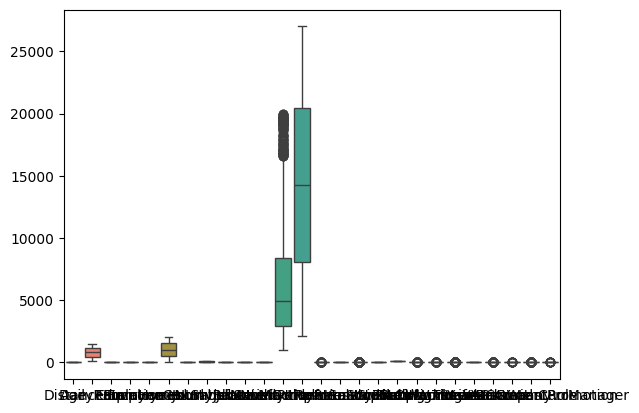

In [18]:
import seaborn as sns

sns.boxplot(df)

# **Check Required Columns Only for Outliers**

**job roles, performance, tenure, and exit interviews**

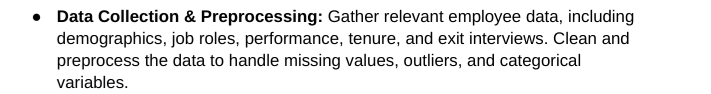

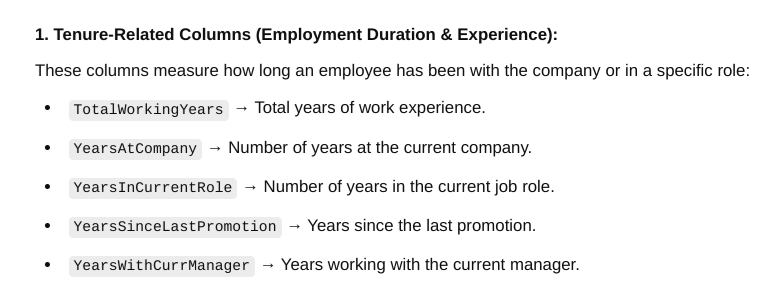


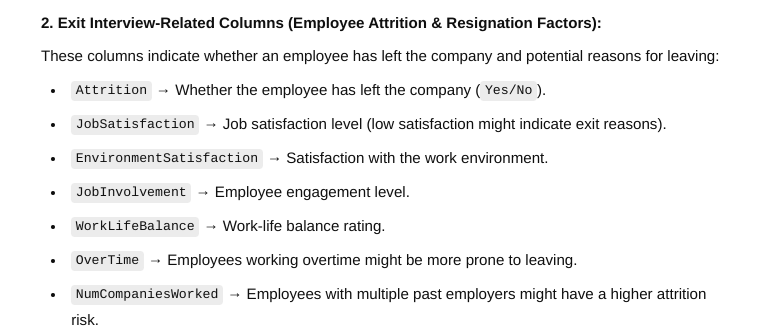

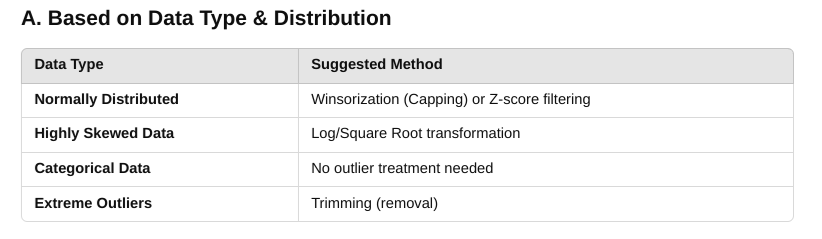

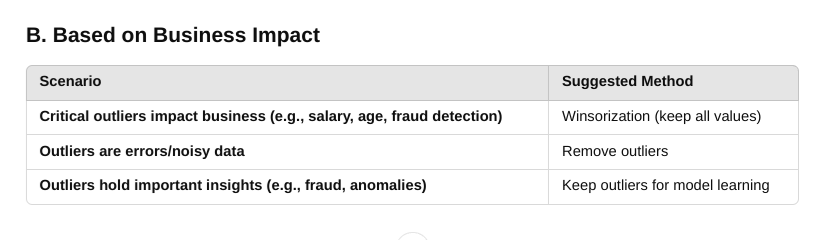

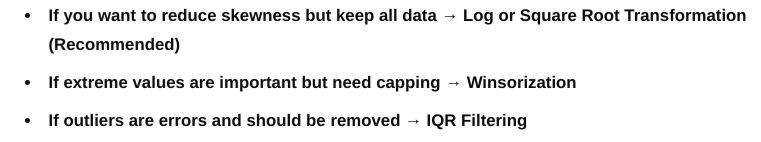

In [19]:
df_pre1=df[['JobRole','PerformanceRating']]
df_pre_tenure=df[['TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
df_pre_exit_interviews=df[['Attrition','JobSatisfaction','EnvironmentSatisfaction','JobInvolvement','WorkLifeBalance','OverTime','NumCompaniesWorked']]

<Axes: >

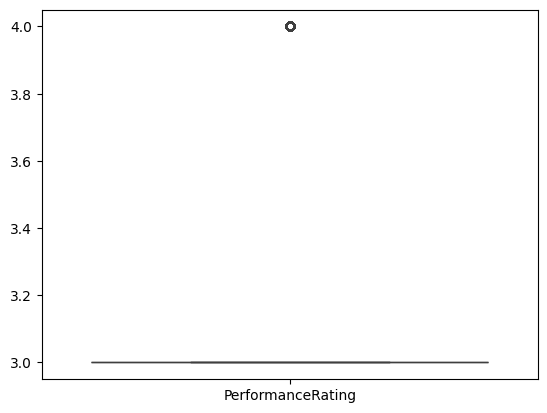

In [20]:
sns.boxplot(df_pre1)

In [21]:
import pandas as pd

# Assuming df_pre1 is already defined
def find_outlier_bounds(df):
    outlier_bounds = {}

    for col in df.select_dtypes(include=['number']).columns:  # Apply only to numerical columns
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR  # Lower boundary
        upper_bound = Q3 + 1.5 * IQR  # Upper boundary

        outlier_bounds[col] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

    return outlier_bounds

# Get IQR outlier boundaries
outlier_bounds = find_outlier_bounds(df_pre1)

# Display results
for col, bounds in outlier_bounds.items():
    print(f"{col}: Lower Bound = {bounds['lower_bound']}, Upper Bound = {bounds['upper_bound']}")

PerformanceRating: Lower Bound = 3.0, Upper Bound = 3.0


# **Check Dataset have Normal distribution or not and skew or skewed**

<ipython-input-22-9b2a1037b214>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pre1['PerformanceRating'])


np.float64(1.921882702142603)

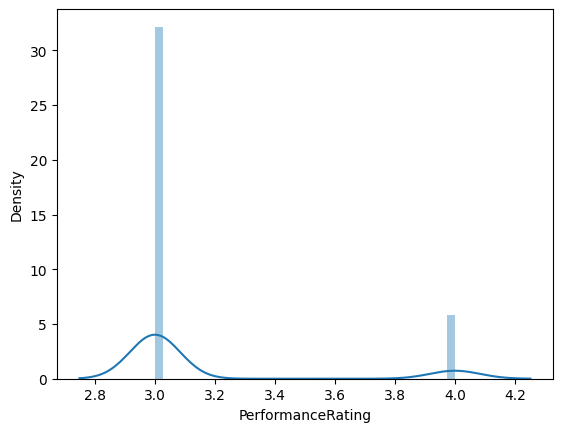

In [22]:
sns.distplot(df_pre1['PerformanceRating'])
df_pre1['PerformanceRating'].skew()

# **Higly Skewed and Long Right tail**

# **to reduce skewness but keep all data → Log or Square Root Transformation (Recommended)**

# **Log Transformation**

In [23]:
import numpy as np

In [24]:
df_pre1['PerformanceRating_log'] = np.log1p(df_pre1['PerformanceRating'])

<ipython-input-24-d3ed059b1de8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre1['PerformanceRating_log'] = np.log1p(df_pre1['PerformanceRating'])


<ipython-input-25-65f160bd9d33>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pre1['PerformanceRating_log'])


np.float64(1.9218827021425997)

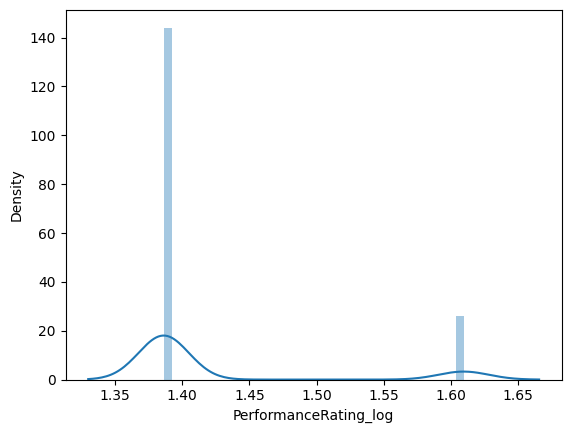

In [25]:
sns.distplot(df_pre1['PerformanceRating_log'])
df_pre1['PerformanceRating_log'].skew()

# **No Changes Happen when i try Log Transformation so no i try square Root Transformation**

# **Square Root Transformation**

<ipython-input-26-1f1c7da78f31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre1['PerformanceRating_sqrt'] = np.sqrt(df_pre1['PerformanceRating'])
<ipython-input-26-1f1c7da78f31>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pre1['PerformanceRating_sqrt'])


1.9218827021425977


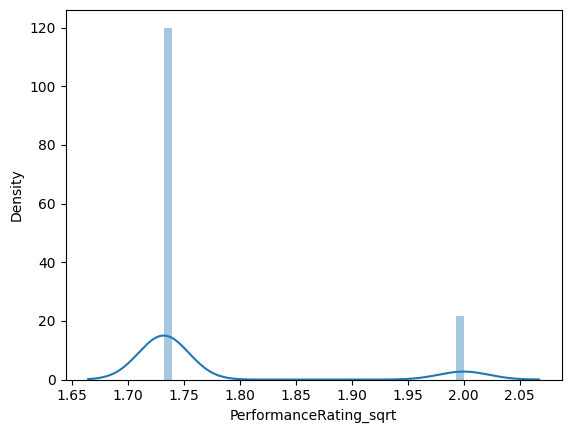

In [26]:
df_pre1['PerformanceRating_sqrt'] = np.sqrt(df_pre1['PerformanceRating'])
sns.distplot(df_pre1['PerformanceRating_sqrt'])
print(df_pre1['PerformanceRating_sqrt'].skew())

# **Log and Square Root not working properly becaues Log & Square Root transformation is effective when data has large values or a wide range**

# **Try Winsorization (Capping Outliers)**

<ipython-input-27-757d2a073066>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre1['PerformanceRating_winsorized'] = winsorize(df_pre1['PerformanceRating'], limits=[0.05, 0.05])
<ipython-input-27-757d2a073066>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pre1['PerformanceRating_winsorized'])


1.921882702142603


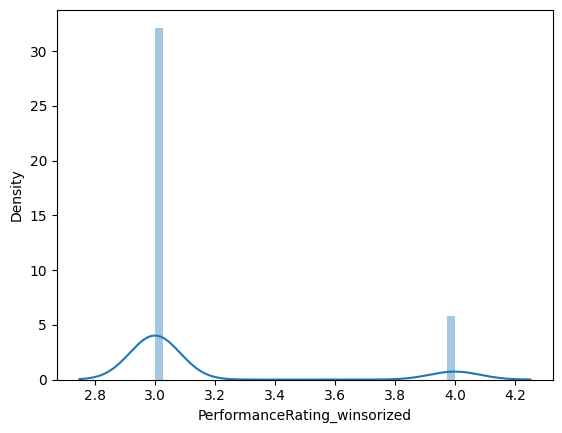

In [27]:
from scipy.stats.mstats import winsorize
df_pre1['PerformanceRating_winsorized'] = winsorize(df_pre1['PerformanceRating'], limits=[0.05, 0.05])
sns.distplot(df_pre1['PerformanceRating_winsorized'])
print(df_pre1['PerformanceRating_winsorized'].skew())

# Increase Winsorization Limits

# Try increasing the limits from 5% to 10%:

<ipython-input-28-a6bf2219c0fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre1['PerformanceRating_winsorized'] = winsorize(df_pre1['PerformanceRating'], limits=[0.10, 0.10])
<ipython-input-28-a6bf2219c0fb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pre1['PerformanceRating_winsorized'])


1.921882702142603


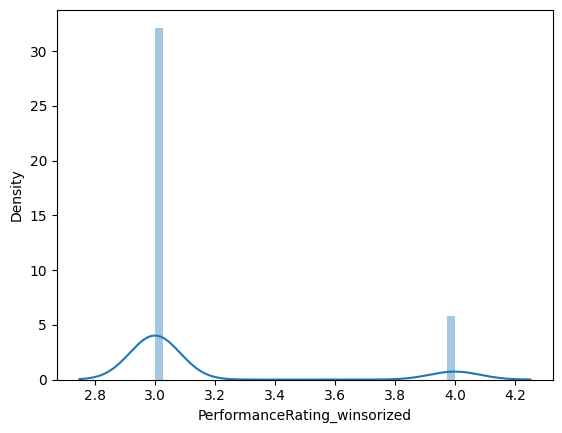

In [28]:
df_pre1['PerformanceRating_winsorized'] = winsorize(df_pre1['PerformanceRating'], limits=[0.10, 0.10])
sns.distplot(df_pre1['PerformanceRating_winsorized'])
print(df_pre1['PerformanceRating_winsorized'].skew())

# **No changes will Happen So now i decided to remove Otliers**

0.0


<ipython-input-29-81ce779782f1>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pre1['PerformanceRating'])
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


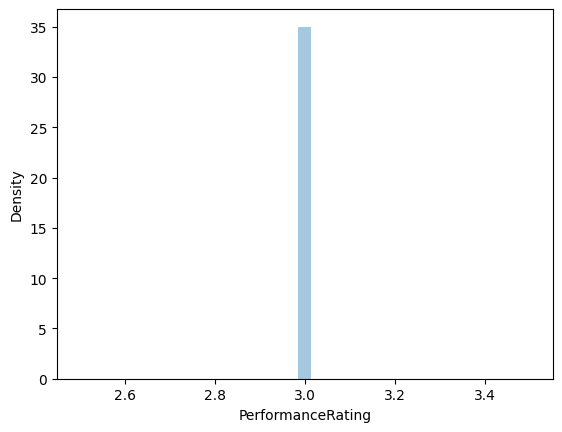

In [29]:
Q1 = df_pre1['PerformanceRating'].quantile(0.25)
Q3 = df_pre1['PerformanceRating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_pre1 = df_pre1[(df_pre1['PerformanceRating'] >= lower_bound) &
                   (df_pre1['PerformanceRating'] <= upper_bound)]

sns.distplot(df_pre1['PerformanceRating'])
print(df_pre1['PerformanceRating'].skew())

# **Outlier removed and now the column has normal distribution**

In [30]:
##################################################################################################

In [31]:
df_pre1

,JobRole,PerformanceRating,PerformanceRating_log,PerformanceRating_sqrt,PerformanceRating_winsorized
0,Sales Executive,3,1.386294,1.732051,3
2,Laboratory Technician,3,1.386294,1.732051,3
3,Research Scientist,3,1.386294,1.732051,3
4,Laboratory Technician,3,1.386294,1.732051,3
5,Laboratory Technician,3,1.386294,1.732051,3
...,...,...,...,...,...
1464,Sales Representative,3,1.386294,1.732051,3
1465,Laboratory Technician,3,1.386294,1.732051,3
1466,Healthcare Representative,3,1.386294,1.732051,3
1468,Sales Executive,3,1.386294,1.732051,3


In [32]:
df_pre1.isnull().sum()

,0
JobRole,0
PerformanceRating,0
PerformanceRating_log,0
PerformanceRating_sqrt,0
PerformanceRating_winsorized,0


In [33]:
df_pre1.drop(columns=['PerformanceRating_log','PerformanceRating_sqrt','PerformanceRating_winsorized'],inplace=True)

In [34]:
############################################################################################

# **2nd - Outlier Method**

In [35]:
df_pre_tenure.head()

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,6,4,0,5
1,10,10,7,1,7
2,7,0,0,0,0
3,8,8,7,3,0
4,6,2,2,2,2


In [36]:
df_pre_tenure.isnull().sum()

,0
TotalWorkingYears,0
YearsAtCompany,0
YearsInCurrentRole,0
YearsSinceLastPromotion,0
YearsWithCurrManager,0


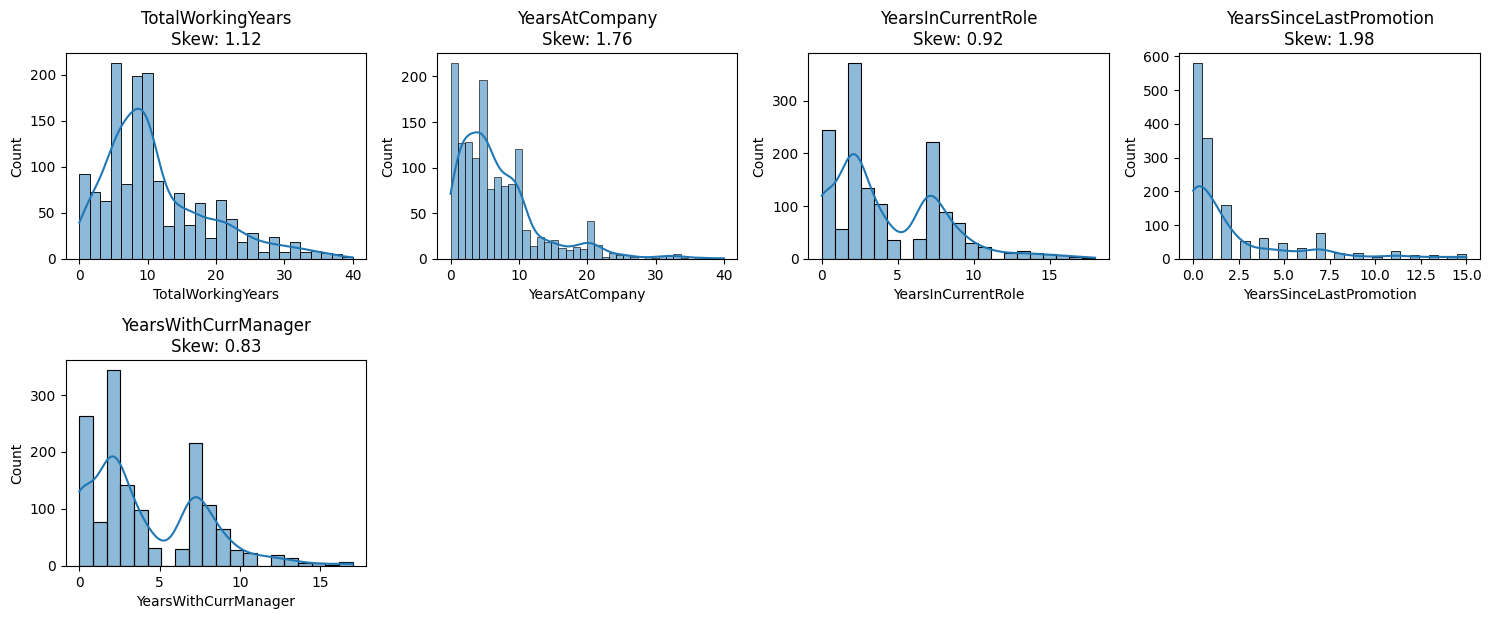

Skewness Values:
 TotalWorkingYears          1.117172
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numerical_cols = df_pre_tenure.select_dtypes(include=['number']).columns

# Set figure size
plt.figure(figsize=(15, 12))

# Loop through each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust subplot grid as needed
    sns.histplot(df_pre_tenure[col], kde=True)  # Histogram with KDE
    plt.title(f"{col}\nSkew: {df_pre_tenure[col].skew():.2f}")  # Show skewness

plt.tight_layout()  # Adjust layout
plt.show()

# Print skew values separately
skew_values = df_pre_tenure[numerical_cols].skew()
print("Skewness Values:\n", skew_values)


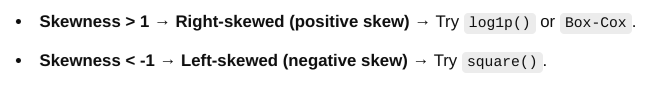

# **Tenure Based Columns are Right Long Tail**

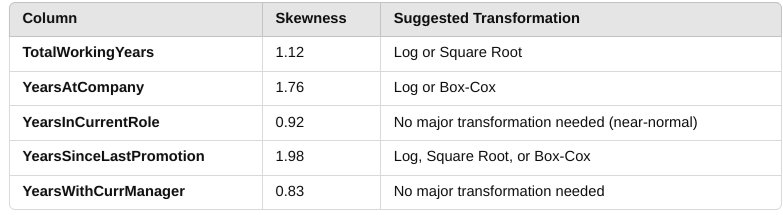

In [38]:
df_pre_tenure['TotalWorkingYears_log'] = np.log1p(df_pre_tenure['TotalWorkingYears'])
df_pre_tenure['YearsAtCompany_log'] = np.log1p(df_pre_tenure['YearsAtCompany'])
df_pre_tenure['YearsSinceLastPromotion_log'] = np.log1p(df_pre_tenure['YearsSinceLastPromotion'])

<ipython-input-38-f37a152087f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_tenure['TotalWorkingYears_log'] = np.log1p(df_pre_tenure['TotalWorkingYears'])
<ipython-input-38-f37a152087f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_tenure['YearsAtCompany_log'] = np.log1p(df_pre_tenure['YearsAtCompany'])
<ipython-input-38-f37a152087f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



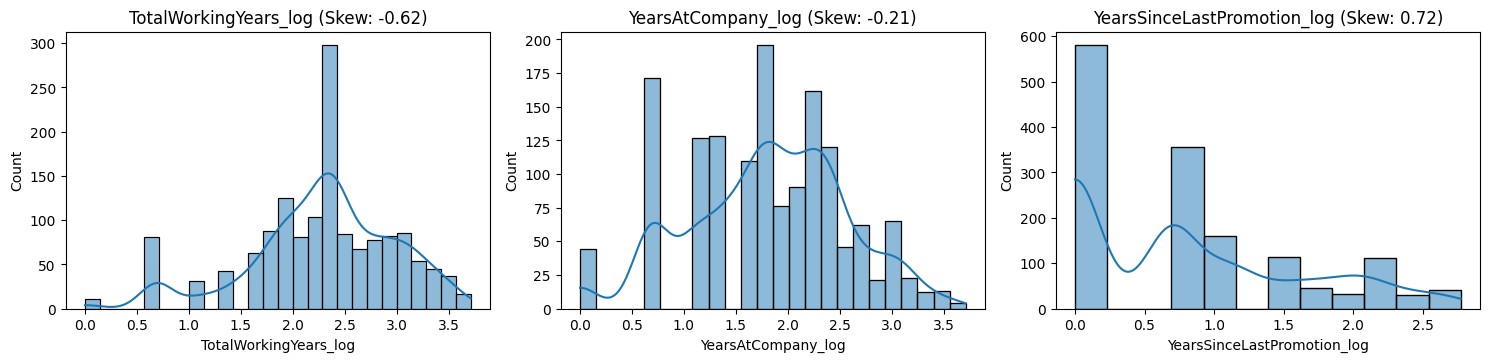

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
columns = ['TotalWorkingYears_log', 'YearsAtCompany_log', 'YearsSinceLastPromotion_log']

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_pre_tenure[col], kde=True)
    plt.title(f"{col} (Skew: {df_pre_tenure[col].skew():.2f})")

plt.tight_layout()
plt.show()


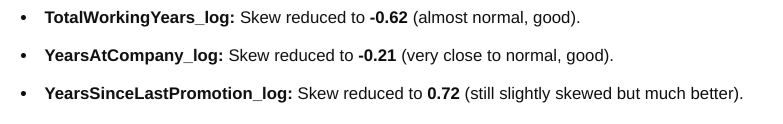

In [40]:
df_pre_tenure['YearsSinceLastPromotion_sqrt'] = np.sqrt(df_pre_tenure['YearsSinceLastPromotion'])

# Check new skewness
print(df_pre_tenure['YearsSinceLastPromotion_sqrt'].skew())

0.7391255688486648


<ipython-input-40-6e5b18ab8520>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_tenure['YearsSinceLastPromotion_sqrt'] = np.sqrt(df_pre_tenure['YearsSinceLastPromotion'])


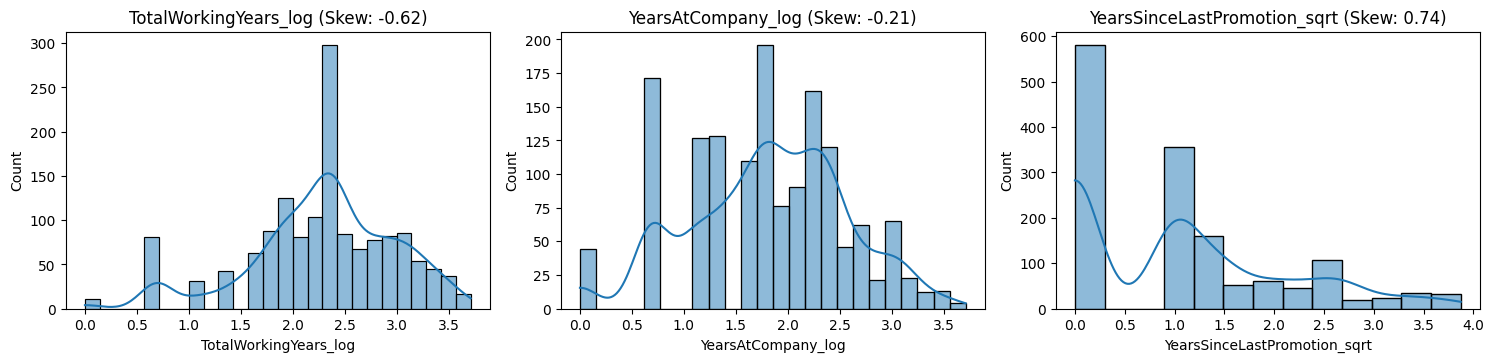

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
columns = ['TotalWorkingYears_log', 'YearsAtCompany_log', 'YearsSinceLastPromotion_sqrt']

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_pre_tenure[col], kde=True)
    plt.title(f"{col} (Skew: {df_pre_tenure[col].skew():.2f})")

plt.tight_layout()
plt.show()


# **Years since last promotion log outlier treatment better than sqrt treatment**

In [42]:
df_pre_tenure.head()

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears_log,YearsAtCompany_log,YearsSinceLastPromotion_log,YearsSinceLastPromotion_sqrt
0,8,6,4,0,5,2.197225,1.945910,0.000000,0.000000
1,10,10,7,1,7,2.397895,2.397895,0.693147,1.000000
2,7,0,0,0,0,2.079442,0.000000,0.000000,0.000000
3,8,8,7,3,0,2.197225,2.197225,1.386294,1.732051
4,6,2,2,2,2,1.945910,1.098612,1.098612,1.414214


In [43]:
df_pre_tenure.drop(columns=['TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','YearsSinceLastPromotion_sqrt'],inplace=True)

<ipython-input-43-af0d367d0ac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_tenure.drop(columns=['TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','YearsSinceLastPromotion_sqrt'],inplace=True)


In [44]:
df_pre_tenure.head()

,YearsInCurrentRole,YearsWithCurrManager,TotalWorkingYears_log,YearsAtCompany_log,YearsSinceLastPromotion_log
0,4,5,2.197225,1.945910,0.000000
1,7,7,2.397895,2.397895,0.693147
2,0,0,2.079442,0.000000,0.000000
3,7,0,2.197225,2.197225,1.386294
4,2,2,1.945910,1.098612,1.098612


In [45]:
#######################################################################################

# **3rd - Outlier Method**

In [46]:
df_pre_exit_interviews.head()

,Attrition,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement,WorkLifeBalance,OverTime,NumCompaniesWorked
0,Yes,4,2,3,1,Yes,8
1,No,2,3,2,3,No,1
2,Yes,3,4,2,3,Yes,6
3,No,3,4,3,3,Yes,1
4,No,2,1,3,3,No,9


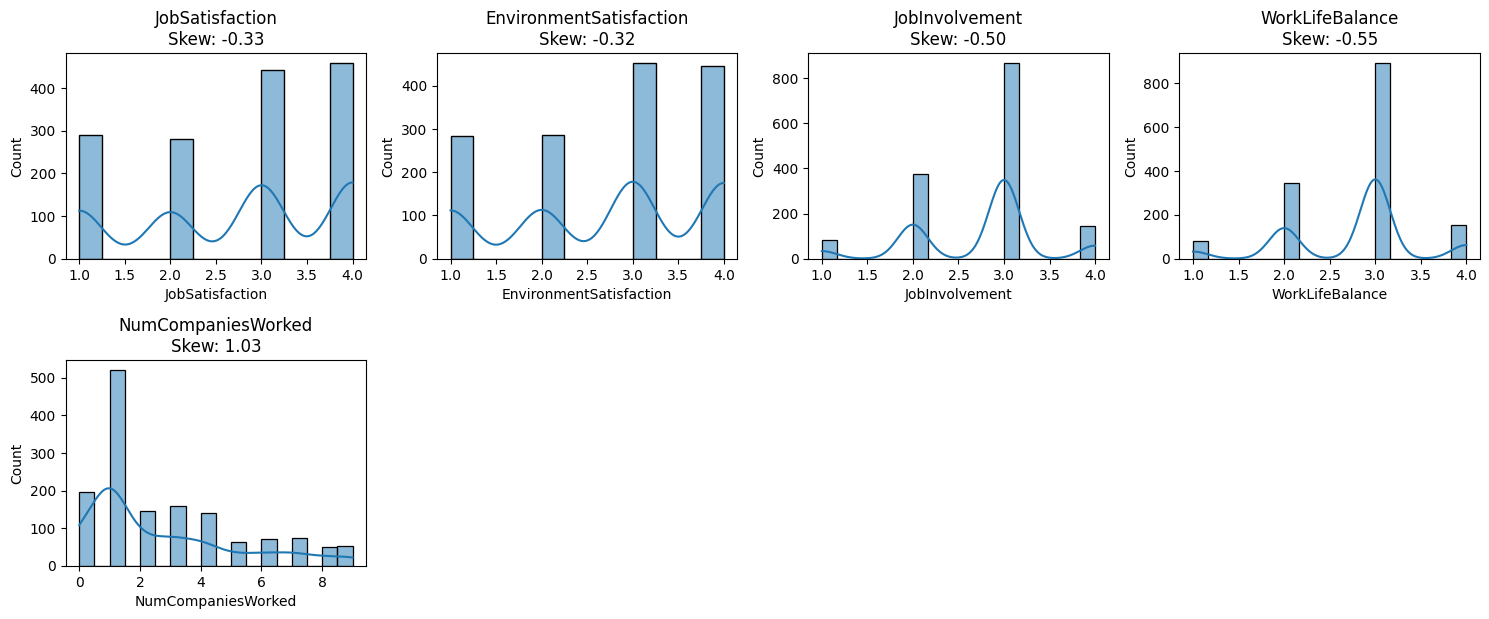

Skewness Values:
 JobSatisfaction           -0.329672
EnvironmentSatisfaction   -0.321654
JobInvolvement            -0.498419
WorkLifeBalance           -0.552480
NumCompaniesWorked         1.026471
dtype: float64


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numerical_cols = df_pre_exit_interviews.select_dtypes(include=['number']).columns

# Set figure size
plt.figure(figsize=(15, 12))

# Loop through each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust subplot grid as needed
    sns.histplot(df_pre_exit_interviews[col], kde=True)  # Histogram with KDE
    plt.title(f"{col}\nSkew: {df_pre_exit_interviews[col].skew():.2f}")  # Show skewness

plt.tight_layout()  # Adjust layout
plt.show()

# Print skew values separately
skew_values = df_pre_exit_interviews[numerical_cols].skew()
print("Skewness Values:\n", skew_values)


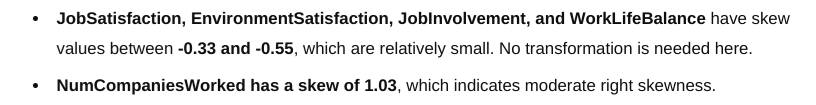

In [48]:
df_pre_exit_interviews.isnull().sum()

,0
Attrition,0
JobSatisfaction,0
EnvironmentSatisfaction,0
JobInvolvement,0
WorkLifeBalance,0
OverTime,0
NumCompaniesWorked,0


In [49]:
##########################################################################################################

# **Attach all Columns**

In [50]:
print(df_pre1.shape, df_pre_tenure.shape, df_pre_exit_interviews.shape)
print(df_pre1.index.equals(df_pre_tenure.index))
print(df_pre1.index.equals(df_pre_exit_interviews.index))

(1244, 2) (1470, 5) (1470, 7)
False
False


# **Index Not Matched**

# **So now Used Inner Join**

In [51]:
df_prep_in = pd.concat([df_pre1, df_pre_tenure, df_pre_exit_interviews], axis=1, join='inner')

In [52]:
df_prep_in.isnull().sum()

,0
JobRole,0
PerformanceRating,0
YearsInCurrentRole,0
YearsWithCurrManager,0
TotalWorkingYears_log,0
YearsAtCompany_log,0
YearsSinceLastPromotion_log,0
Attrition,0
JobSatisfaction,0
EnvironmentSatisfaction,0


In [53]:
df_prep_in.shape

(1244, 14)

# **Three Columns Need to change column name**

In [54]:
df_prep_in.rename(columns={
    'TotalWorkingYears_log': 'TotalWorkingYears',
    'YearsAtCompany_log': 'YearsAtCompany',
    'YearsSinceLastPromotion_log': 'YearsSinceLastPromotion'
}, inplace=True)

In [55]:
df_prep_in.head()

,JobRole,PerformanceRating,YearsInCurrentRole,YearsWithCurrManager,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement,WorkLifeBalance,OverTime,NumCompaniesWorked
0,Sales Executive,3,4,5,2.197225,1.945910,0.000000,Yes,4,2,3,1,Yes,8
2,Laboratory Technician,3,0,0,2.079442,0.000000,0.000000,Yes,3,4,2,3,Yes,6
3,Research Scientist,3,7,0,2.197225,2.197225,1.386294,No,3,4,3,3,Yes,1
4,Laboratory Technician,3,2,2,1.945910,1.098612,1.098612,No,2,1,3,3,No,9
5,Laboratory Technician,3,7,6,2.197225,2.079442,1.386294,No,4,4,3,2,No,0


In [56]:
##################################################################################################################

In [57]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [58]:
df_full = df.copy()

In [59]:
df_full.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [60]:
df_full.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [61]:
df_prep_in.isnull().sum()

,0
JobRole,0
PerformanceRating,0
YearsInCurrentRole,0
YearsWithCurrManager,0
TotalWorkingYears,0
YearsAtCompany,0
YearsSinceLastPromotion,0
Attrition,0
JobSatisfaction,0
EnvironmentSatisfaction,0


In [62]:
df_prep_in.columns

Index(['JobRole', 'PerformanceRating', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'Attrition', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance',
       'OverTime', 'NumCompaniesWorked'],
      dtype='object')

In [63]:
#####################################################################################

In [64]:
df_full.shape

(1470, 35)

In [65]:
df_prep_in.shape

(1244, 14)

# **Extreme Outliers was removed**

In [66]:
#########################################################################################

In [67]:
df_full.drop(columns=['JobRole', 'PerformanceRating', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'Attrition', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance',
       'OverTime', 'NumCompaniesWorked'],inplace=True)

In [68]:
df_full.shape

(1470, 21)

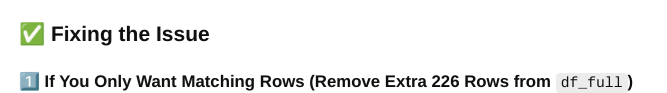

In [69]:
df_new = pd.concat([df_full.loc[df_prep_in.index], df_prep_in], axis=1)

In [70]:
df_new.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Gender,...,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement,WorkLifeBalance,OverTime,NumCompaniesWorked
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,Female,...,2.197225,1.945910,0.000000,Yes,4,2,3,1,Yes,8
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,...,2.079442,0.000000,0.000000,Yes,3,4,2,3,Yes,6
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,Female,...,2.197225,2.197225,1.386294,No,3,4,3,3,Yes,1
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,Male,...,1.945910,1.098612,1.098612,No,2,1,3,3,No,9
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,Male,...,2.197225,2.079442,1.386294,No,4,4,3,2,No,0


In [71]:
df_new.shape

(1244, 35)

In [72]:
df_new.to_csv('outlier-treated.csv')

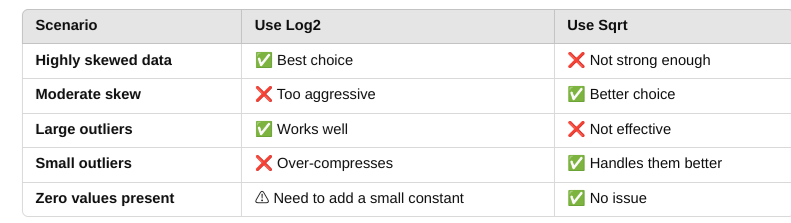

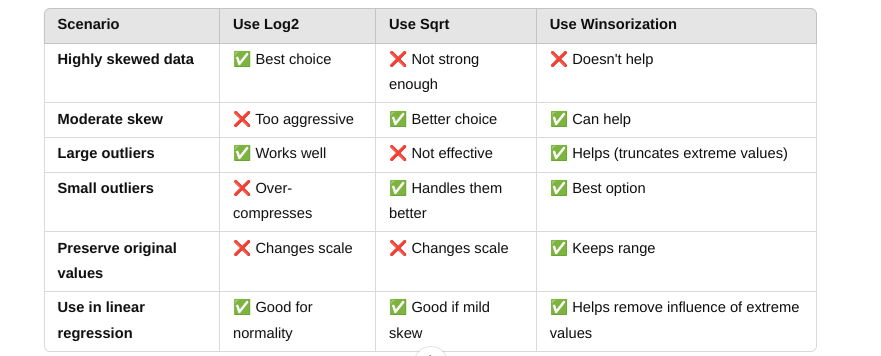

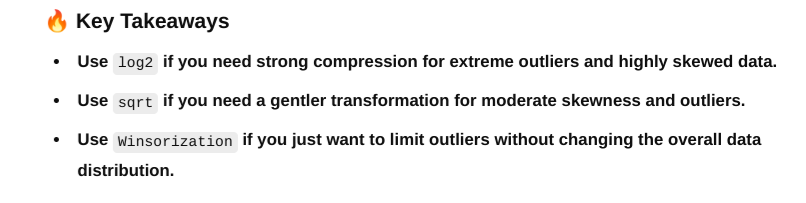

# **A log transformation is a mathematical technique used to reduce skewness and normalize highly**

In [73]:
df_new.isnull().sum()

,0
Age,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0
Gender,0
